# Fast Classification with scikit-learn
This example uses the Iris dataset.

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Load
iris = pd.read_csv('../data/iris.csv')
X = iris.drop(columns=['target'])
y = iris['target']

# Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Train baseline
clf = LogisticRegression(max_iter=1000)
clf.fit(X_train, y_train)

# Evaluate
pred = clf.predict(X_test)
print('Accuracy:', accuracy_score(y_test, pred))
print(classification_report(y_test, pred))

Accuracy: 0.9666666666666667
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        10
           1       1.00      0.90      0.95        10
           2       0.91      1.00      0.95        10

    accuracy                           0.97        30
   macro avg       0.97      0.97      0.97        30
weighted avg       0.97      0.97      0.97        30



## What happened
- We used logistic regression which is a strong baseline
- We trained on 80 percent and tested on 20 percent
- We reported accuracy and per-class metrics

## Try a different model

In [2]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
print('RandomForest test accuracy:', rf.score(X_test, y_test))

RandomForest test accuracy: 0.9


## Inspect feature importance

Matplotlib is building the font cache; this may take a moment.


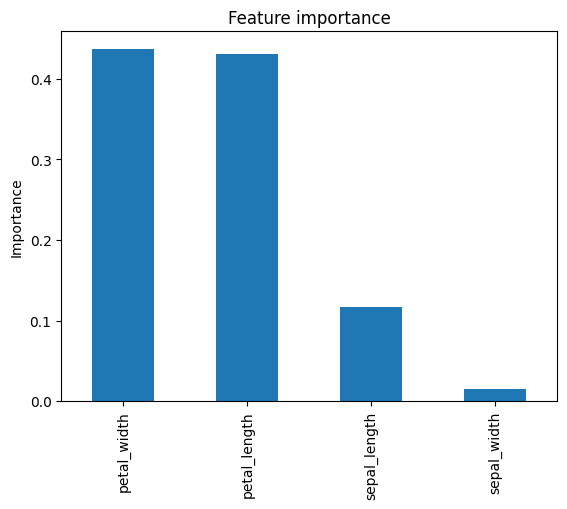

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
imp = pd.Series(rf.feature_importances_, index=X.columns).sort_values(ascending=False)
ax = imp.plot(kind='bar')
ax.set_title('Feature importance')
ax.set_ylabel('Importance')
plt.show()